# California Housing 

load modules and dataset

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [33]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [34]:
from sklearn import datasets

dataset_housing = datasets.fetch_california_housing()
df = pd.DataFrame(dataset_housing.data, columns=dataset_housing.feature_names)
df["target"] = dataset_housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [35]:
print(dataset_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

---

#### define X and y

In [36]:
X = df.iloc[:, :-1]
y = df["target"]

#### Data Preprocessing
- null data or outliers?
- Multicollinearity
- train test split
- scaling

you do not need to process every step. Do if you think it is necessary

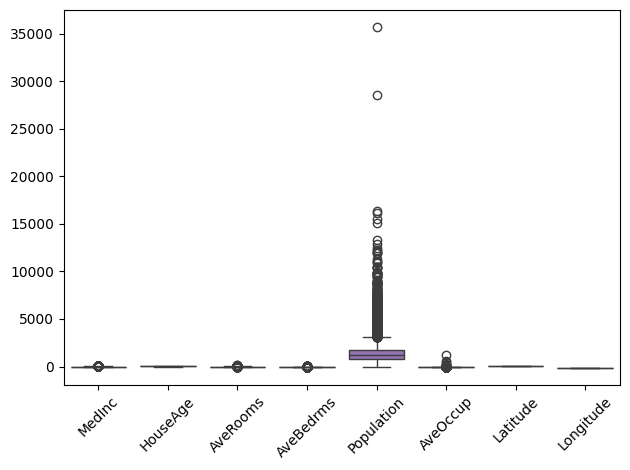

In [37]:
sns.boxplot(X)
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='Population', ylabel='Count'>

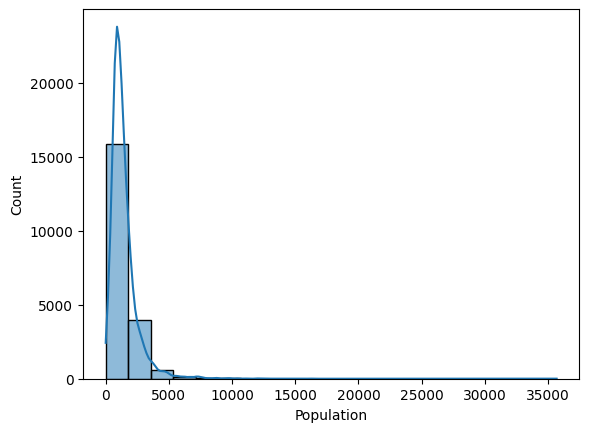

In [38]:
sns.histplot(df["Population"], bins=20, kde=True)

In [39]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [40]:
x = df["AveRooms"]
print("1th percentile: ", x.quantile(q=0.01))
print("5th percentile: ", x.quantile(q=0.05))
print("95th percentile: ", x.quantile(q=0.95))
print("99th percentile: ", x.quantile(q=0.99))
df[(x < x.quantile(q=0.99))]

1th percentile:  2.581133407821229
5th percentile:  3.4323300062383035
95th percentile:  7.640246547450425
99th percentile:  10.357033023735815


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [41]:
x = df["AveBedrms"]
print("1th percentile: ", x.quantile(q=0.01))
print("5th percentile: ", x.quantile(q=0.05))
print("95th percentile: ", x.quantile(q=0.95))
print("99th percentile: ", x.quantile(q=0.99))
df[(x < x.quantile(q=0.99))]

1th percentile:  0.8728398268398269
5th percentile:  0.9391087789438615
95th percentile:  1.273005717594268
99th percentile:  2.127540822838997


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [42]:
x = df["AveOccup"]
print("1th percentile: ", x.quantile(q=0.01))
print("5th percentile: ", x.quantile(q=0.05))
print("95th percentile: ", x.quantile(q=0.95))
print("99th percentile: ", x.quantile(q=0.99))
df[(x < x.quantile(q=0.99))]

1th percentile:  1.5366864723576525
5th percentile:  1.872544757033248
95th percentile:  4.333416666666666
99th percentile:  5.394812032520327


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [43]:
x = df["Population"]
print("1th percentile: ", x.quantile(q=0.01))
print("5th percentile: ", x.quantile(q=0.05))
print("95th percentile: ", x.quantile(q=0.95))
print("99th percentile: ", x.quantile(q=0.99))
df[(x < x.quantile(q=0.99))]

1th percentile:  88.0
5th percentile:  348.0
95th percentile:  3288.0
99th percentile:  5805.830000000002


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [44]:
dfraw = df.copy()

In [45]:
df = dfraw.copy()

df = df.drop("AveBedrms", axis=1)

x = df["AveOccup"]
df = df[(x < x.quantile(q=0.99))]

x = df["AveRooms"]
df = df[(x < x.quantile(q=0.99))]

x = df["Population"]
df = df[(x < x.quantile(q=0.99)) & (x > x.quantile(q=0.01))]

df.describe().round(2)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
count,19822.00,19822.00,19822.00,19822.00,19822.00,19822.00,19822.00,19822.00
mean,3.87,28.89,5.28,1375.49,2.89,35.63,-119.58,2.08
std,1.88,12.46,1.22,854.53,0.69,2.13,2.00,1.16
min,0.50,1.00,1.13,108.00,0.97,32.54,-124.35,0.15
25%,2.57,19.00,4.44,802.00,2.43,33.93,-121.81,1.20
50%,3.53,29.00,5.22,1170.00,2.82,34.25,-118.50,1.81
75%,4.74,37.00,6.02,1708.00,3.27,37.71,-118.02,2.66
max,15.00,52.00,10.34,5696.00,5.39,41.95,-114.55,5.00


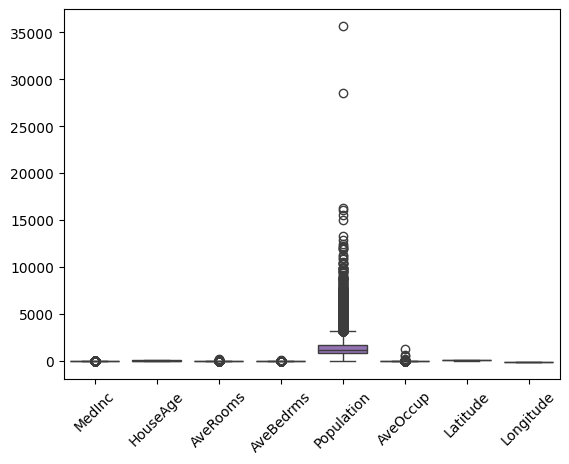

In [46]:
sns.boxplot(X)
plt.xticks(rotation=45)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

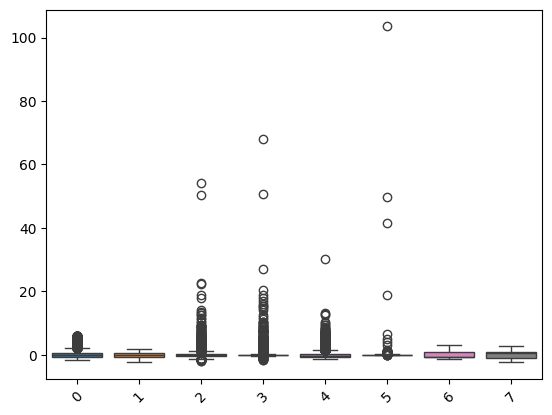

In [49]:
sns.boxplot(X_train_scaled)
plt.xticks(rotation=45)
plt.show()

In [50]:
# x = df["AveBedrms"]
# print("5th percentile: ", x.quantile(q=0.05))
# print("95th percentile: ", x.quantile(q=0.95))
# print("99th percentile: ", x.quantile(q=0.99))
# df[(x < x.quantile(q=0.99))]

In [51]:
# x = df["AveBedrms"]
# print("5th percentile: ", x.quantile(q=0.05))
# print("95th percentile: ", x.quantile(q=0.95))
# # x[(x < x.quantile(q=0.05)) | (x > x.quantile(q=0.95))]

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_test_scaled)

In [54]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.4798607922116856

In [55]:
reg.score(X_test_scaled, y_test)

0.6262255619979016

In [56]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [61]:
iris["species"].replace("setosa", 0, inplace=True)
iris["species"].replace("versicolor", 1, inplace=True)
iris["species"].replace("virginica", 2, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
X = iris.iloc[:, :-1]
y = iris["species"]

In [ ]:
from sklearn.